# Evaluate Head Detection and Cut Detection

A script for evaluating the performance of a system (e.g. head detection, cut detection) against ground truth face and cut labels from `txt` files with hand coding data in [the Gaze Data for the Analysis of Attention in Feature Films dataset](http://graphics.stanford.edu/~kbreeden/gazedata.html).

Takes in pickled dictionaries of ground truth labels and labels created by the system being evaluated. Each dictionary has keys that are frame numbers and values that indicate whether or not the frame contains the feature (0 if the frame does not contain the feature; 1 if the frame does). Compares the two dictionaries to compute accuracy, precision, recall, and F1 scores.

In [1]:
import os
import pickle
import collections

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def load_pickled_labels_into_dict(label_dicts_dir_path, filename_part_to_drop):
    """
    Loads pickled frame-to-feature dictionaries for multiple clips into a single nested dictionary for all clips.
    
    Parameters:
    - label_dicts_dir_path: the path to the folder containing the pickled frame-to-feature dictionaries (of all the clips) for this feature.
    - filename_part_to_drop: the part of the pickled frame-to-feature dictionary filenames we should drop (for determining clip name keys for the single nested dictionary).
    
    Returns a nested dictionary where keys are clip names, and values are dictionaries mapping frame number keys to feature label values (0 if feature is not in the frame; 1 if it is).
    """
    # Get list of all files and directories in the directory with all the pickled frame-to-feature dictionaries for all the clips
    file_list = os.listdir(label_dicts_dir_path)

    # Create dictionary where keys are clip names, values are dictionaries of the frame-to-feature labels
    label_dicts = {}
    # For each pickled dict...
    for filename in file_list:
        # We only want to process our pickled dictionaries, which are pkl files
        if filename.endswith(".pkl"):
            clip = filename.replace(filename_part_to_drop, "")

            # Load (deserialize) pickled data
            with open(label_dicts_dir_path + "/" + filename, "rb") as f:
                label_dicts[clip] = pickle.load(f)
                
    return label_dicts

In [4]:
def evaluate_system(system_labels, ground_truth_labels):
    """
    Evaluates the performance of a system by comparing labels as assigned by the system, versus ground-truth labels.
    
    Parameters:
    - system_labels: feature labels assigned by our system.
    - ground_truth_labels: ground-truth feature labels from the hand coding in the Gaze dataset.
    Each parameter is a dictionary from clip name keys to values of dictionaries of frame number keys to feature binary label values (0 if feature is not in the frame; 1 if it is).
    
    Returns dictionary of num of true positives, num of true negatives, num of false positives, num of false negatives, as well as system's accuracy, precision, recall, and F1 scores.
    """
    # Create a Counter of (system prediction, ground truth label) tuples
    c = collections.Counter()
    
    # For each clip...
    for clip in system_labels:
        # For each frame...
        for frame_num in system_labels[clip]:
            system = system_labels[clip][frame_num]
            ground_truth = ground_truth_labels[clip][frame_num]
            c[(system, ground_truth)] += 1

    # Count the number of true positives (tn), true negatives (tn), false positives (fp), and false negatives (fn)
    # 1 (frame contains the feature) is the positive class, and 0 (frame does not contain the feature) is the negative class
    tp = c[(1, 1)] # system predicted 1, and ground truth was actually 1 
    tn = c[(0, 0)] # system predicted 0, and ground truth was actually 0
    fp = c[(1, 0)] # system predicted 1, but ground truth was actually 0
    fn = c[(0, 1)] # system predicted 0, but ground truth was actually 1
    
    # Compute evaluation metrics: accuracy, precision, recall, and F1
    accuracy  = (tp + tn) / sum(c.values())
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0 # given a prediction, what is the likelihood that prediction is accurate?
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0    # out of all the actual positives out there, how many did we find?
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    results = {"truePositives": tp, "trueNegatives": tn, "falsePositives": fp, "falseNegatives": fn,
               "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}
    return results

## Evaluate Performance of Head Detection Using A Single Haar Cascade

In [5]:
# Load all head labels predicted by a Haar Cascade head detection system into a single nested dictionary
head_haar_dicts = load_pickled_labels_into_dict("head_label_dicts_haar", "_frame_to_head_dict.pkl")

# Load all ground-truth face labels from the hand coding in the Gaze dataset into a single nested dictionary
ground_truth_dicts = load_pickled_labels_into_dict("ground_truth_face_label_dicts", "_hcode_frame_to_face_dict.pkl")

# Evaluate performance of head detection using Haar Cascades
evaluate_system(head_haar_dicts, ground_truth_dicts)

{'truePositives': 12896,
 'trueNegatives': 12684,
 'falsePositives': 220,
 'falseNegatives': 28326,
 'accuracy': 0.47260096811144364,
 'precision': 0.98322659347362,
 'recall': 0.3128426568337296,
 'f1': 0.4746586182781846}

## Evaluate Performance of Head Detection Using Two Haar Cascades

In [6]:
# Load all head labels predicted by a multiple Haar Cascade head detection system into a single nested dictionary
head_haar_multiple_dicts = load_pickled_labels_into_dict("head_label_dicts_haar_multiple_2", "_frame_to_head_dict.pkl")

# Load all ground-truth face labels from the hand coding in the Gaze dataset into a single nested dictionary
ground_truth_dicts = load_pickled_labels_into_dict("ground_truth_face_label_dicts", "_hcode_frame_to_face_dict.pkl")

# Evaluate performance of head detection using multiple Haar Cascades
evaluate_system(head_haar_multiple_dicts, ground_truth_dicts)

{'truePositives': 14235,
 'trueNegatives': 12654,
 'falsePositives': 250,
 'falseNegatives': 26987,
 'accuracy': 0.4967852787939253,
 'precision': 0.9827407663099759,
 'recall': 0.34532531172674785,
 'f1': 0.5110668318164683}

## Evaluate Performance of Head Detection Using Three Haar Cascades

In [7]:
# Load all head labels predicted by a multiple Haar Cascade head detection system into a single nested dictionary
head_haar_multiple_dicts = load_pickled_labels_into_dict("head_label_dicts_haar_multiple_3", "_frame_to_head_dict.pkl")

# Load all ground-truth face labels from the hand coding in the Gaze dataset into a single nested dictionary
ground_truth_dicts = load_pickled_labels_into_dict("ground_truth_face_label_dicts", "_hcode_frame_to_face_dict.pkl")

# Evaluate performance of head detection using multiple Haar Cascades
evaluate_system(head_haar_multiple_dicts, ground_truth_dicts)

{'truePositives': 14974,
 'trueNegatives': 12643,
 'falsePositives': 261,
 'falseNegatives': 26248,
 'accuracy': 0.5102353767135942,
 'precision': 0.9828683951427634,
 'recall': 0.36325263208966085,
 'f1': 0.5304568078360522}

Break down results for Haar Cascade head detection by each film clip.

In [8]:
for clip in head_haar_multiple_dicts:
    # Create nested system and ground-truth dictionaries where the only key in the outer dictionary is the name of the current clip
    # So that we can see the evaluation metrics for the single clip.
    head_haar_multiple_dict = head_haar_multiple_dicts.copy()
    clip_names = list(head_haar_multiple_dict.keys())
    for clip_name in clip_names:
        if clip_name != clip:
            del head_haar_multiple_dict[clip_name]

    ground_truth_dict = ground_truth_dicts.copy()
    for clip_name in clip_names:
        if clip_name != clip:
            del ground_truth_dict[clip_name]
    
    print(clip)
    print(evaluate_system(head_haar_multiple_dict, ground_truth_dict))
    print()
    

emperor
{'truePositives': 798, 'trueNegatives': 631, 'falsePositives': 8, 'falseNegatives': 1752, 'accuracy': 0.44810285355910945, 'precision': 0.9900744416873449, 'recall': 0.3129411764705882, 'f1': 0.4755661501787843}

no_country_clip2
{'truePositives': 739, 'trueNegatives': 1, 'falsePositives': 0, 'falseNegatives': 605, 'accuracy': 0.550185873605948, 'precision': 1.0, 'recall': 0.5498511904761905, 'f1': 0.7095535285645703}

slumdog
{'truePositives': 318, 'trueNegatives': 1695, 'falsePositives': 37, 'falseNegatives': 1860, 'accuracy': 0.5148337595907928, 'precision': 0.895774647887324, 'recall': 0.14600550964187328, 'f1': 0.2510856691669957}

argo
{'truePositives': 1374, 'trueNegatives': 811, 'falsePositives': 32, 'falseNegatives': 2940, 'accuracy': 0.42369594725615667, 'precision': 0.9772403982930299, 'recall': 0.3184979137691238, 'f1': 0.4804195804195804}

chicago
{'truePositives': 1240, 'trueNegatives': 1302, 'falsePositives': 19, 'falseNegatives': 1029, 'accuracy': 0.708077994428

## Evaluate Performance of Cut Detection Using Lucas-Kanade Optical Flow

Lucas-Kanade optical flow with `err_threshold` of 20 and `num_votes_threshold` of 0.6.

In [9]:
# Load all cut labels predicted by a Lucas-Kanade optical flow head detection system into a single nested dictionary
cut_lk_optical_flow_dicts = load_pickled_labels_into_dict("cut_label_dicts_lk_optical_flow/cut_label_dicts_lk_optical_flow_err_20_votes_0.6", "_frame_to_cut_dict.pkl")

# Load all ground-truth cut labels from the hand coding in the Gaze dataset into a single nested dictionary
ground_truth_dicts = load_pickled_labels_into_dict("ground_truth_cut_label_dicts", "_hcode_frame_to_cut_dict.pkl")

# Evaluate performance of cut detection using Lucas-Kanade optical flow
evaluate_system(cut_lk_optical_flow_dicts, ground_truth_dicts)

{'truePositives': 772,
 'trueNegatives': 51415,
 'falsePositives': 1353,
 'falseNegatives': 571,
 'accuracy': 0.9644434588161372,
 'precision': 0.3632941176470588,
 'recall': 0.5748324646314222,
 'f1': 0.4452133794694349}

Break down results for Lucas-Kanade optical flow by each film clip.

In [10]:
for clip in cut_lk_optical_flow_dicts:
    # Create nested system and ground-truth dictionaries where the only key in the outer dictionary is the name of the current clip
    # So that we can see the evaluation metrics for the single clip.
    cut_lk_optical_flow_dict = cut_lk_optical_flow_dicts.copy()
    clip_names = list(cut_lk_optical_flow_dict.keys())
    for clip_name in clip_names:
        if clip_name != clip:
            del cut_lk_optical_flow_dict[clip_name]

    ground_truth_dict = ground_truth_dicts.copy()
    for clip_name in clip_names:
        if clip_name != clip:
            del ground_truth_dict[clip_name]
    
    print(clip)
    print(evaluate_system(cut_lk_optical_flow_dict, ground_truth_dict))
    print()
    
    

amadeus
{'truePositives': 60, 'trueNegatives': 4610, 'falsePositives': 6, 'falseNegatives': 22, 'accuracy': 0.9940400170285227, 'precision': 0.9090909090909091, 'recall': 0.7317073170731707, 'f1': 0.8108108108108109}

shakespeare_clip1
{'truePositives': 18, 'trueNegatives': 1855, 'falsePositives': 38, 'falseNegatives': 8, 'accuracy': 0.976029181865555, 'precision': 0.32142857142857145, 'recall': 0.6923076923076923, 'f1': 0.4390243902439025}

departed
{'truePositives': 38, 'trueNegatives': 2241, 'falsePositives': 6, 'falseNegatives': 18, 'accuracy': 0.9895788102475033, 'precision': 0.8636363636363636, 'recall': 0.6785714285714286, 'f1': 0.76}

unforgiven
{'truePositives': 74, 'trueNegatives': 3376, 'falsePositives': 21, 'falseNegatives': 14, 'accuracy': 0.9899569583931134, 'precision': 0.7789473684210526, 'recall': 0.8409090909090909, 'f1': 0.808743169398907}

no_country_clip2
{'truePositives': 22, 'trueNegatives': 1316, 'falsePositives': 2, 'falseNegatives': 4, 'accuracy': 0.9955357142

## Evaluate Performance of Cut Detection Using Lucas-Kanade Optical Flow, Varying Thresholds

In [11]:
# Experiment with thresholds to find most optimal ones for cut detection using Lucas-Kanade.

# A window should have err vector value above this err_threshold to contribute to a vote for a cut.
# Error measure: L1 distance between patches around the original and a moved point, divided by number of pixels in a window.
err_thresholds = [10, 20, 25, 30, 40, 50]
# > 50%, 60%, 70%, 80%, 90% of the windows should have err above err_threshold for a cut to be detected btwn old_frame and frame.
num_votes_thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

lk_threshold_results = {}

for err_threshold in err_thresholds:
    for num_votes_threshold in num_votes_thresholds:
        # Load all cut labels predicted by a Lucas-Kanade optical flow head detection system into a single nested dictionary
        cut_lk_optical_flow_dicts = load_pickled_labels_into_dict("cut_label_dicts_lk_optical_flow/cut_label_dicts_lk_optical_flow_err_" + str(err_threshold) + "_votes_" + str(num_votes_threshold), "_frame_to_cut_dict.pkl")

        # Load all ground-truth cut labels from the hand coding in the Gaze dataset into a single nested dictionary
        ground_truth_dicts = load_pickled_labels_into_dict("ground_truth_cut_label_dicts", "_hcode_frame_to_cut_dict.pkl")

        # Evaluate performance of cut detection using Lucas-Kanade optical flow
        lk_threshold_results[(err_threshold, num_votes_threshold)] = evaluate_system(cut_lk_optical_flow_dicts, ground_truth_dicts)

print(lk_threshold_results)

{(10, 0.5): {'truePositives': 1104, 'trueNegatives': 41882, 'falsePositives': 10886, 'falseNegatives': 239, 'accuracy': 0.7944040952856166, 'precision': 0.0920767306088407, 'recall': 0.8220402084884587, 'f1': 0.16560414010350258}, (10, 0.6): {'truePositives': 1039, 'trueNegatives': 45092, 'falsePositives': 7676, 'falseNegatives': 304, 'accuracy': 0.8525253645284693, 'precision': 0.11921973608720597, 'recall': 0.7736411020104245, 'f1': 0.20660171008152717}, (10, 0.7): {'truePositives': 909, 'trueNegatives': 48018, 'falsePositives': 4750, 'falseNegatives': 434, 'accuracy': 0.9041969285357876, 'precision': 0.1606290864110267, 'recall': 0.676842889054356, 'f1': 0.2596401028277635}, (10, 0.8): {'truePositives': 724, 'trueNegatives': 50130, 'falsePositives': 2638, 'falseNegatives': 619, 'accuracy': 0.9398089113119329, 'precision': 0.21534800713860797, 'recall': 0.5390915860014892, 'f1': 0.3077577045696068}, (10, 0.9): {'truePositives': 512, 'trueNegatives': 51153, 'falsePositives': 1615, 'fa

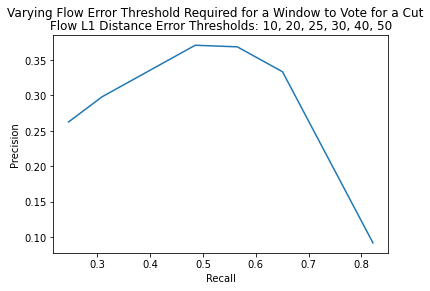

In [12]:
# Plot precision-recall curve, keeping num_votes_threshold constant at 0.5, and varying err_threshold to be 10, 20, 25, 30, 40, 50
precision_scores = []
recall_scores = []
num_votes_threshold = 0.5
for err_threshold in err_thresholds:
    precision_scores.append(lk_threshold_results[(err_threshold, num_votes_threshold)]["precision"])
    recall_scores.append(lk_threshold_results[(err_threshold, num_votes_threshold)]["recall"])

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(recall_scores, precision_scores)
fig.suptitle('Varying Flow Error Threshold Required for a Window to Vote for a Cut')
ax.set_title('Flow L1 Distance Error Thresholds: 10, 20, 25, 30, 40, 50')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

plt.savefig('cut_detection_precision_recall_curve_lk_optical_flow_err_threshold.jpg')

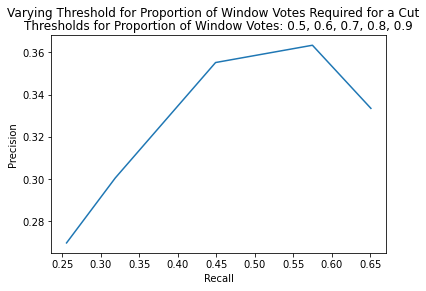

In [13]:
# Plot precision-recall curve, keeping err_threshold constant at 20, and varying num_votes_threshold to be 0.5, 0.6, 0.7, 0.8, 0.9
precision_scores = []
recall_scores = []
err_threshold = 20
for num_votes_threshold in num_votes_thresholds:
    precision_scores.append(lk_threshold_results[(err_threshold, num_votes_threshold)]["precision"])
    recall_scores.append(lk_threshold_results[(err_threshold, num_votes_threshold)]["recall"])

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(recall_scores, precision_scores)
fig.suptitle('Varying Threshold for Proportion of Window Votes Required for a Cut')
ax.set_title('Thresholds for Proportion of Window Votes: 0.5, 0.6, 0.7, 0.8, 0.9')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

plt.savefig('cut_detection_precision_recall_curve_lk_optical_flow_num_votes_threshold.jpg')